# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [210]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [211]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [212]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [218]:
df = pd.merge(cell_phones,population,on=['geo','time'])

In [219]:
df.tail()

,geo,time,cell_phones_total,population_total
8585,zwe,2013,"13,633,167.0",15054506
8586,zwe,2014,"11,798,652.0",15411675
8587,zwe,2015,"12,757,410.0",15777451
8588,zwe,2016,"12,878,926.0",16150362
8589,zwe,2017,"14,092,104.0",16529904


In [220]:
population.count()

geo                 59297
time                59297
population_total    59297
dtype: int64

In [221]:
cell_phones.count()

geo                  9215
time                 9215
cell_phones_total    9215
dtype: int64

In [222]:
df.shape

(8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [223]:
geo_country_codes

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,...,12.5,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,...,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,...,-12.5,18.5,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.21667,-63.05,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america
5,akr_a_dhe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,NaN,Akrotiri and Dhekelia,NaN,False,NaN,NaN,europe,europe_central_asia
6,ala,NaN,√Öland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.25,20.0,NaN,Åland,NaN,False,AX,AALAND ISLANDS,europe,europe_central_asia
7,alb,NaN,NaN,NaN,NaN,Albania,NaN,NaN,NaN,NaN,...,41.0,20.0,muslim,Albania,ALBANIA,True,AL,ALBANIA,europe,europe_central_asia
8,and,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42.50779,1.52109,christian,Andorra,NaN,True,AD,ANDORRA,europe,europe_central_asia
9,ant,NaN,Neth. Antilles,NaN,NaN,Netherland Antilles,NaN,NaN,NaN,NaN,...,nan,nan,NaN,Netherlands Antilles,NaN,False,NaN,NETHERLANDS ANTILLES,americas,america


In [224]:
df = pd.merge(df,geo_country_codes[['geo','country']],on='geo')

In [225]:
df.shape

(8590, 5)

***Optional bonus for Part 1: Take initiative to join more data.***

### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [226]:
df

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan
5,afg,1977,0.0,13067538,Afghanistan
6,afg,1978,0.0,13237734,Afghanistan
7,afg,1979,0.0,13306695,Afghanistan
8,afg,1980,0.0,13248370,Afghanistan
9,afg,1981,0.0,13053954,Afghanistan


In [227]:
df['cells_per_person'] =  df['cell_phones_total'] / df['population_total']

In [228]:
df[(df['country'] == 'United States') & (df['time'] == 2017)]

,geo,time,cell_phones_total,population_total,country,cells_per_person
8134,usa,2017,"395,881,000.0",324459463,United States,1.2201246847283354


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [229]:
df['geo'] = df['geo'].str.upper()

In [230]:
df

,geo,time,cell_phones_total,population_total,country,cells_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0
5,AFG,1977,0.0,13067538,Afghanistan,0.0
6,AFG,1978,0.0,13237734,Afghanistan,0.0
7,AFG,1979,0.0,13306695,Afghanistan,0.0
8,AFG,1980,0.0,13248370,Afghanistan,0.0
9,AFG,1981,0.0,13053954,Afghanistan,0.0


***Optional bonus for Part 2: Take initiative to make more features.***

### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [231]:
import numpy as np

In [232]:
df.describe()

,time,cell_phones_total,population_total,cells_per_person
count,"8,590.0","8,590.0","8,590.0","8,590.0"
mean,"1,994.1934807916182","9,004,949.642905472","29,838,230.581722934",0.2796385558059151
std,14.257974607310302,"55,734,084.872179635","116,128,377.47477299",0.454246656214052
min,"1,960.0",0.0,"4,433.0",0.0
25%,"1,983.0",0.0,"1,456,148.0",0.0
50%,"1,995.0","6,200.0","5,725,062.5",0.0015636266438163813
75%,"2,006.0","1,697,652.0","18,105,812.0",0.4611491855201403
max,"2,017.0","1,474,097,000.0","1,409,517,397.0",2.490242818521353


In [233]:
df.describe(exclude=np.number)

,geo,country
count,8590,8590
unique,195,195
top,KWT,Mexico
freq,46,46


In [234]:
df.head()

,geo,time,cell_phones_total,population_total,country,cells_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


In [235]:
top_five = df[df['time'] == 2017][['country','cell_phones_total']].sort_values(by='cell_phones_total',ascending=False)

In [236]:
top_five.head()

,country,cell_phones_total
1496,China,"1,474,097,000.0"
3595,India,"1,168,902,277.0"
3549,Indonesia,"458,923,202.0"
8134,United States,"395,881,000.0"
1084,Brazil,"236,488,548.0"


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [237]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

2017 was the first year that China had more cell phones than people.

What was the first year that the USA had more cell phones than people?

### 2014!

In [238]:
df[(df['country'] == 'United States') & (df['cells_per_person'] >= 1)]

,geo,time,cell_phones_total,population_total,country,cells_per_person
8131,USA,2014,"355,500,000.0",317718779,United States,1.118914031833164
8132,USA,2015,"382,307,000.0",319929162,United States,1.1949739048796058
8133,USA,2016,"395,881,000.0",322179605,United States,1.228758722948959
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354


***Optional bonus for Part 3: Take initiative to do more exploratory data analysis.***

### (OPTIONAL) Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [240]:
df.head()

,geo,time,cell_phones_total,population_total,country,cells_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


In [248]:
country_list = ['China', 'India', 'United States', 'Indonesia', 'Brazil']

In [249]:
subset = df[(df['time']>= 2007) & (df['time']<= 2017) & (df['country'].isin(country_list))]

In [252]:
pivot = pd.pivot_table(subset,columns='time',index='country',values='cell_phones_total')

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

## India

In [281]:
change = pivot[2017] - pivot[2007]

In [282]:
change = change.sort_values(ascending=False)

In [283]:
sort_index = change.index

In [284]:
sort_index

Index(['India', 'China', 'Indonesia', 'United States', 'Brazil'], dtype='object', name='country')

In [285]:
pivot.reindex(sort_index)

time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0"
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0"


In [256]:
pivot.pct_change(axis='columns')

time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,
Brazil,nan,0.24517502683891745,0.12442914515340786,0.16261356692550644,0.19005501031437677,0.05959355080526607,0.09171937968402477,0.03551827421310638,-0.08162512120772958,-0.05332101200882311,-0.03105211661325158
China,nan,0.17163890035921403,0.16525508970830183,0.14960774289560952,0.14813685167572177,0.12765689939599678,0.10516339898665206,0.04635863423460651,0.004580695175232297,0.05646338399494355,0.07997676078110727
India,nan,0.4848471877407756,0.5137075153506876,0.432497286179512,0.18834666507132503,-0.03260183945208628,0.02495987731496041,0.06510679862534108,0.060430930763573976,0.12661929002972871,0.036436379741605185
Indonesia,nan,0.5053318142191727,0.16431218307373485,0.2908978374787885,0.18228662578750976,0.12873227643450247,0.11087687131602575,0.03944713703625102,0.041051063569788715,0.13755800662720463,0.19023564483564304
United States,nan,0.048134777376654725,0.04968618446230377,0.03950299508172206,0.04309093077252224,0.024996301327487203,0.01922332517599501,0.14419790278662892,0.07540646976090004,0.03550549689124183,0.0


If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [287]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [288]:
sub_df = df[df['Year'] == 1999]

In [289]:
sub_df['Occupation'].count()

166

In [290]:
sub_df.groupby('Occupation')['Occupation'].count() / sub_df['Occupation'].count()

Occupation
Acting, Comedy & Music      0.9036144578313253
Government and Politics   0.012048192771084338
Media                      0.06626506024096386
Other                     0.018072289156626505
Name: Occupation, dtype: float64

In [291]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [292]:
cross_df = pd.crosstab(df['Year'],df['Occupation'],normalize='index')

In [293]:
cross_df

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.9036144578313253,0.012048192771084338,0.06626506024096386,0.018072289156626505
2000,0.7396449704142012,0.08284023668639054,0.1242603550295858,0.05325443786982249
2001,0.7261146496815286,0.03821656050955414,0.19745222929936307,0.03821656050955414
2002,0.6226415094339622,0.06918238993710692,0.2641509433962264,0.0440251572327044
2003,0.5602409638554217,0.10240963855421686,0.2469879518072289,0.09036144578313253
2004,0.38414634146341464,0.22560975609756098,0.27439024390243905,0.11585365853658537
2005,0.37037037037037035,0.16049382716049382,0.3333333333333333,0.13580246913580246
2006,0.36024844720496896,0.19254658385093168,0.2919254658385093,0.15527950310559005
2007,0.2553191489361702,0.1702127659574468,0.3333333333333333,0.24113475177304963


### Part 2 — Recreate this explanatory visualization:

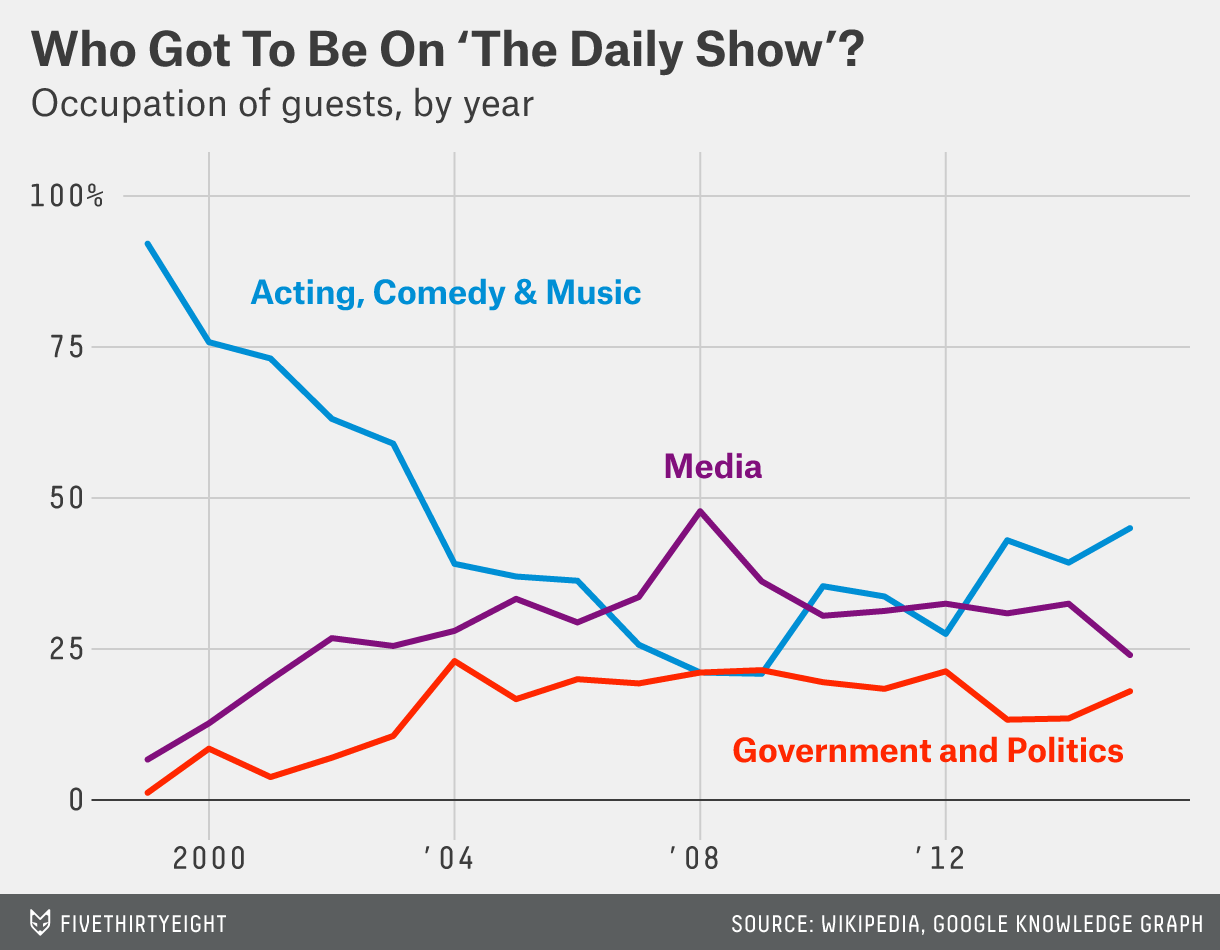

In [294]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

In [295]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [296]:
cross_df.head()

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.9036144578313253,0.012048192771084338,0.06626506024096386,0.018072289156626505
2000,0.7396449704142012,0.08284023668639054,0.1242603550295858,0.05325443786982249
2001,0.7261146496815286,0.03821656050955414,0.19745222929936307,0.03821656050955414
2002,0.6226415094339622,0.06918238993710692,0.2641509433962264,0.0440251572327044
2003,0.5602409638554217,0.10240963855421686,0.2469879518072289,0.09036144578313253


Text(0.08, 1, "Who Got To Be On 'The Daily Show'?")

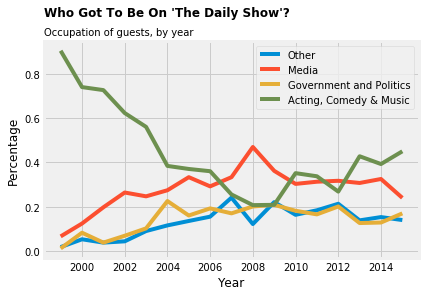

In [297]:
fig = plt.Figure()
plt.plot(cross_df.index,cross_df['Other'])
plt.plot(cross_df.index,cross_df['Media'])
plt.plot(cross_df.index,cross_df['Government and Politics'])
plt.plot(cross_df.index,cross_df['Acting, Comedy & Music'])

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(loc='upper right')
plt.title('Occupation of guests, by year',loc='left',fontweight='light',fontsize=10)
plt.suptitle(t="Who Got To Be On 'The Daily Show'?",x=.08,y=1,ha='left',fontweight='bold')


**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

### (OPTIONAL) Part 3 — Who were the top 10 guests on _The Daily Show_?

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)

In [309]:
top_guests = df.groupby('Guest')['Guest'].count().sort_values(ascending=False).head(10)

In [312]:
top_guests.index

Index(['Fareed Zakaria', 'Denis Leary', 'Brian Williams', 'Ricky Gervais',
       'Paul Rudd', 'Tom Brokaw', 'Will Ferrell', 'Bill O'Reilly',
       'Reza Aslan', 'Richard Lewis'],
      dtype='object', name='Guest')

<Figure size 14400x1440 with 0 Axes>

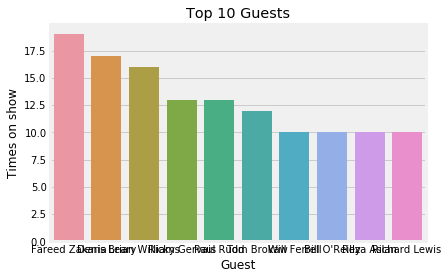

<Figure size 14400x1440 with 0 Axes>

In [321]:
sns.barplot(x=top_guests.index,y=top_guests.values)
plt.ylabel('Times on show')
plt.title('Top 10 Guests')
plt.figure(figsize=(200, 20))